In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nyt-ingredients-snapshot-2015.csv')
print(df.head())
print(df.shape)
print(df.dtypes)
print(len(df))

   index                                              input              name  \
0      0  1 1/4 cups cooked and pureed fresh butternut s...  butternut squash   
1      1  1 cup peeled and cooked fresh chestnuts (about...         chestnuts   
2      2            1 medium-size onion, peeled and chopped             onion   
3      3                    2 stalks celery, chopped coarse            celery   
4      4                    1 1/2 tablespoons vegetable oil     vegetable oil   

    qty  range_end        unit  \
0  1.25        0.0         cup   
1  1.00        0.0         cup   
2  1.00        0.0         NaN   
3  2.00        0.0       stalk   
4  1.50        0.0  tablespoon   

                                             comment  
0  cooked and pureed fresh, or 1 10-ounce package...  
1  peeled and cooked fresh (about 20), or 1 cup c...  
2                    medium-size, peeled and chopped  
3                                     chopped coarse  
4                                

In [4]:
unique_ingredients = df.name.unique()

print('In 2015, New York Times Cooking published recipes that used '+ str(len(unique_ingredients)) + ' different ingredients')

In 2015, New York Times Cooking published recipes that used 17590 different ingredients


In [5]:
df['name']=df['name'].str.lower()

ingredient_counts = df.groupby('name').index.count().reset_index()
ingredient_counts.rename(columns={
    'index': 'count'},
    inplace=True)
print(ingredient_counts.head())
print(ingredient_counts.shape)

                              name  count
0   additional sweet ripe tomatoes      1
1                     agave nectar      1
2                   albacore tuna       1
3                all-purpose flour      3
4                    almond powder      1
(16490, 2)


In [6]:
ingredient_counts.sort_values(by = ['count'], ascending = False, inplace = True)
print(ingredient_counts.head(50))

                         name  count
12689                    salt   8336
6412                   garlic   5646
10300               olive oil   4826
14371                   sugar   4037
2171                   butter   3016
10342                   onion   2864
1696             black pepper   2623
15274         unsalted butter   2429
10947                  pepper   2251
15702                   water   2154
5069                     eggs   2070
10682                 parsley   2003
12741         salt and pepper   1944
8719              lemon juice   1933
5022                      egg   1570
7468              heavy cream   1561
5706                    flour   1539
15045                tomatoes   1429
9657                     milk   1385
12704   salt and black pepper   1282
8691                    lemon   1270
6592                   ginger   1260
5171   extra virgin olive oil   1258
14882                   thyme   1183
12928               scallions   1131
781         all-purpose flour   1129
8

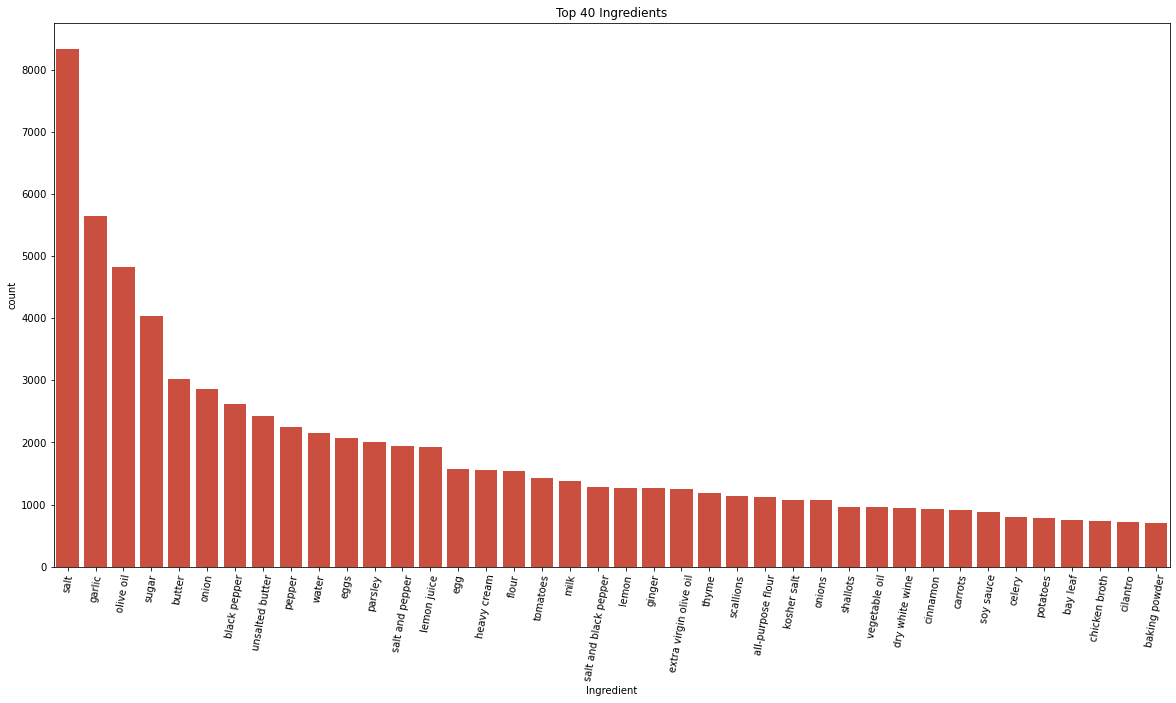

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(data = ingredient_counts.head(40), x = 'name', y = 'count', color='#E33D26')
ax = plt.subplot()
ax.tick_params(axis='x', rotation=80)
plt.xlabel('Ingredient')
plt.title('Top 40 Ingredients')
plt.show()

In [8]:
ingredient_counts.sort_values(by = ['count'], ascending = True, inplace = True)
print(ingredient_counts.head(50))

                                                    name  count
12573  ruby red jasmine rice, red bhutanese or regula...      1
3707                                       coconut juice      1
3708                                   coconut macaroons      1
3710                     coconut milk (do not shake can)      1
3712                      coconut oil or unsalted butter      1
3713                  coconut purée or coconut ice cream      1
3714                                         coconut rum      1
3715                         coconut sorbet or ice cream      1
3717                            coconut water (not milk)      1
3718                          coconut water simple syrup      1
3719                                            coconut.      1
3720                                   coconut/41 grams       1
3722                                       cocounut milk      1
3724                                     cod and halibut      1
3706                                   c